## Load and split rooftops for Kilifi

In [1]:
%load_ext autoreload
%autoreload 2

import geopandas as gpd
import pandas as pd
from pathlib import Path
from os import makedirs
import matplotlib.pyplot as plt

In [2]:
# Paths to files
INPUT_PATH = Path("../data/01_Raw data/")
OUTPUT_PATH = Path("../data/03_Output/Kilifi -- Kenya/")

ROOFTOP_SHP = INPUT_PATH / "01_Rooftop/Kenya/KEN.parquet"
COUNTY_SHP = INPUT_PATH / "02_Admin boundary data/Kenya/counties/counties.shp"
SUBCOUNTY_SHP = INPUT_PATH / "02_Admin boundary data/Kenya/ke_subcounty/ke_subcounty.shp"
LOCATION_SHP = INPUT_PATH / "02_Admin boundary data/Kenya/Ken_Locations/Ken_Locations.shp"
SUBLOCATION_SHP = INPUT_PATH / "02_Admin boundary data/Kenya/ken_sublocations_2/Ken_Sublocations/Ken_Sublocations.shp"


merged_subcounty_locations = OUTPUT_PATH / "00_utils_data/Merged sublocation census.csv"

In [8]:
rooftops = gpd.read_parquet(ROOFTOP_SHP)
counties = gpd.read_file(COUNTY_SHP)
counties.set_crs(epsg=4326, inplace=True)

subcounties = gpd.read_file(SUBCOUNTY_SHP)
subcounties.set_crs(epsg=4326, inplace=True)

locations = gpd.read_file(LOCATION_SHP)
locations.set_crs(epsg=4326, inplace=True)

sublocations = gpd.read_file(SUBLOCATION_SHP)
sublocations.set_crs(epsg=4326, inplace=True)

merged_data = pd.read_csv(merged_subcounty_locations)

# filtered shapes
subcounties_kilifi = subcounties[subcounties.county == "Kilifi"].copy()
county_kilifi = counties[counties.COUNTY_NAM == "KILIFI"].copy()
sublocations_kilifi = sublocations[sublocations.geometry.within(county_kilifi.unary_union.buffer(0.01))].copy()
locations_kilifi = locations[locations.geometry.within(county_kilifi.unary_union.buffer(0.01))].copy()
rooftops_kilifi = rooftops[rooftops.geometry.within(county_kilifi.unary_union.buffer(0.0005))].copy()

merged_data_with_geom = sublocations_kilifi.merge(
    merged_data.drop(columns="SLNAME"), 
    on='SLID', how='inner').copy()

/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_2466/2413082932.py:19: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sublocations_kilifi = sublocations[sublocations.geometry.within(county_kilifi.unary_union.buffer(0.01))].copy()
/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_2466/2413082932.py:20: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  locations_kilifi = locations[locations.geometry.within(county_kilifi.unary_union.buffer(0.01))].copy()
/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_2466/2413082932.py:21: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  rooftops_kilifi = rooftops[rooftops.geometry.within(county_kilifi.unary_union.buffer(0.0005))].copy()


In [6]:
merged_data_with_geom


,SLID,SLNAME,geometry,A,index_right,country,provpcode,province,ctypcode,county,...,level5,ind_total,ind_male,ind_female,hh_total,hh_conventional,km2,density,score_fuzzy,merge
0,301010101.0,KONJORA,"POLYGON ((39.82549 -3.54983, 39.81931 -3.56998...",1573,290,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,KONJORA,15768,7740,8028,2633,2633,39.3,401.0,NaN,Exact
1,301010102.0,SOKONI,"POLYGON ((39.84762 -3.61978, 39.84858 -3.62024...",1575,290,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,SOKONI,8637,4158,4479,2571,2571,1.1,7864.0,NaN,Exact
2,301010103.0,HOSPITAL,"POLYGON ((39.88548 -3.60158, 39.88465 -3.60362...",1576,290,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,HOSPITAL,39776,19263,20512,11550,11546,11.6,3443.0,NaN,Exact
3,301010104.0,MNARANI,"POLYGON ((39.83858 -3.67471, 39.83768 -3.67375...",1577,290,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,MNARANI,11253,5468,5785,3379,3379,16.0,704.0,NaN,Exact
4,301010201.0,MTONDIA/MAJAONI,"POLYGON ((39.87851 -3.53402, 39.9104 -3.54257,...",1578,290,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,MTONDIA/MAJAONI,23004,11463,11541,4841,4841,39.2,587.0,0.995476,Fuzzy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,307030703.0,MALANGA,"POLYGON ((39.81043 -3.2126, 39.81196 -3.21384,...",2342,7,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,MALANGA,5626,2643,2983,913,913,34.8,162.0,1.000000,Fuzzy
158,307030704.0,MKONDONI,"POLYGON ((39.76664 -3.12704, 39.76661 -3.12802...",2344,172,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,MKONDONI,2997,1434,1563,465,457,39.8,75.0,NaN,Exact
159,307030801.0,MAKONGENI,"POLYGON ((39.57703 -3.10582, 39.57858 -3.1058,...",2349,123,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,MAKONGENI,9142,4710,4432,1592,1592,1224.8,7.0,1.000000,Fuzzy
160,307030802.0,MATOLANI,"POLYGON ((39.97454 -2.42531, 39.97475 -2.42815...",2350,123,Kenya,KEN_1_1,Coast,KEN_2_3,Kilifi,...,MATOLANI,2358,1161,1197,486,486,122.4,19.0,1.000000,Fuzzy


In [ ]:
# Save filtered shapes
county_kilifi.to_file(OUTPUT_PATH / "00_utils_data" / "Kilifi_county.kml", driver='KML')
subcounties_kilifi.to_file(OUTPUT_PATH / "00_utils_data" / "Kilifi_subcounties.kml", driver='KML')
locations_kilifi.to_file(OUTPUT_PATH / "00_utils_data" / "Kilifi_locations.kml", driver='KML')
sublocations_kilifi.to_file(OUTPUT_PATH / "00_utils_data" / "Kilifi_sublocations.kml", driver='KML')

merged_data_with_geom.to_file(OUTPUT_PATH / "00_utils_data" / "Kilifi_merged_sublocations.kml", driver='KML')
merged_data_with_geom.to_file(OUTPUT_PATH / "00_utils_data" / "Kilifi_merged_sublocations.shp")

/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_2466/58861814.py:8: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  merged_data_with_geom.to_file(OUTPUT_PATH / "00_utils_data" / "Kilifi_merged_sublocations.shp")
/Users/poornimaramesh/Library/Caches/pypoetry/virtualenvs/pin-drop-sampling2-RChTn2Ku-py3.12/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(
/Users/poornimaramesh/Library/Caches/pypoetry/virtualenvs/pin-drop-sampling2-RChTn2Ku-py3.12/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'hh_conventional' to 'hh_convent'
  ogr_write(
/Users/poornimaramesh/Library/Caches/pypoetry/virtualenvs/pin-drop-sampling2-RChTn2Ku-py3.12/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'score_fuzzy' to 'score_fuzz'
  ogr_write(
/Users/poornimara

In [16]:
subcounties

,country,provpcode,province,ctypcode,county,scpcode,subcounty,dhis2_id,geometry
0,Kenya,KEN_1_1,Coast,KEN_2_1,Mombasa,KEN_3_6,Mvita Sub County,C1xuoa1NAMm,"POLYGON ((39.6776 -4.04654, 39.67773 -4.04659,..."
1,Kenya,KEN_1_7,Nyanza,KEN_2_42,Kisumu,KEN_3_240,Kisumu Central Sub County,OpLt8IgyHop,"POLYGON ((34.76317 -0.12726, 34.76295 -0.12751..."
2,Kenya,KEN_1_3,Eastern,KEN_2_15,Kitui,KEN_3_70,Kitui West Sub County,cmWAJB5kCDW,"POLYGON ((38.03021 -1.23441, 38.03012 -1.23849..."
3,Kenya,KEN_1_6,Western,KEN_2_39,Bungoma,KEN_3_219,Bumula Sub County,jkQZEow83MX,"POLYGON ((34.52783 0.50833, 34.52831 0.50798, ..."
4,Kenya,KEN_1_7,Nyanza,KEN_2_42,Kisumu,KEN_3_244,Nyakach Sub County,kBQIjtWUBqj,"POLYGON ((35.00564 -0.33966, 35.00569 -0.33964..."
...,...,...,...,...,...,...,...,...,...
299,Kenya,KEN_1_3,Eastern,KEN_2_16,Machakos,None,Kalama Sub County,pJDgmrxMQTn,"POLYGON ((37.35751 -1.52616, 37.35753 -1.52645..."
300,Kenya,KEN_1_3,Eastern,KEN_2_16,Machakos,KEN_3_81,Machakos Sub County,KXc4ez8OAFz,"POLYGON ((37.14068 -1.5639, 37.14131 -1.55821,..."
301,Kenya,KEN_1_2,North Eastern,KEN_2_9,Mandera,None,Kutulo Sub County,iGFdm333PJ2,"POLYGON ((40.69359 2.77733, 40.69443 2.77617, ..."
302,Kenya,KEN_1_2,North Eastern,KEN_2_9,Mandera,KEN_3_42,MANDERA SOUTH,qyhVIMG2rUw,"POLYGON ((41.02655 3.04799, 41.02692 3.04804, ..."


/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_2466/3388638474.py:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  rooftops_kilifi.centroid.plot(ax=ax3, color="black", markersize=1)


Text(0.5, 1.0, 'Rooftops')

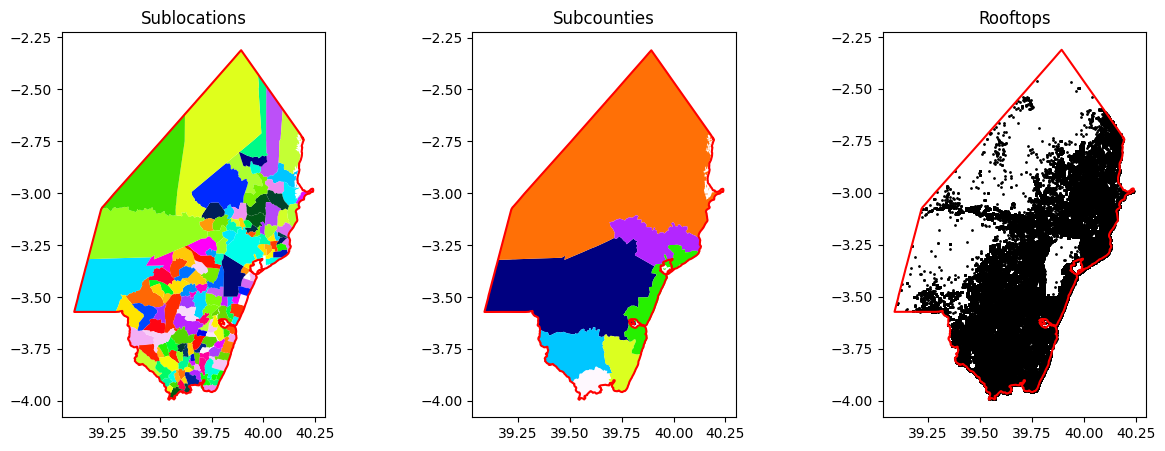

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

merged_data_with_geom.plot(ax=ax1,column='SLNAME', cmap="gist_ncar")
county_kilifi.boundary.plot(ax=ax1, color='red')
ax1.set_title("Sublocations")

subcounties_kilifi.plot(ax=ax2,column='subcounty', cmap="gist_ncar")
county_kilifi.boundary.plot(ax=ax2, color='red')
ax2.set_title("Subcounties")

rooftops_kilifi.centroid.plot(ax=ax3, color="black", markersize=1)
county_kilifi.boundary.plot(ax=ax3, color='red')
ax3.set_title("Rooftops")

In [14]:
# Filter rooftops to sublocation
OUTPUT_PATH_SHAPES =  Path("./01_filtered_shapes")
makedirs(OUTPUT_PATH_SHAPES, exist_ok=True)

for i, subcounty in subcounties_kilifi.iterrows():
    print("\n Subcounty: ", subcounty.subcounty)
    # filter sublocations
    subcounty = gpd.GeoDataFrame(
        [subcounty], 
        crs=subcounties.crs, 
        geometry=[subcounty.geometry],
        )
    
    OUTPUT_PATH_SUBCOUNTY = OUTPUT_PATH_SHAPES / subcounty.subcounty.values[0]
    makedirs(OUTPUT_PATH_SUBCOUNTY, exist_ok=True)

    filtered_sublocations = merged_data_with_geom[
        merged_data_with_geom.geometry.within(subcounty.unary_union.buffer(0.018))].copy()
    filtered_sublocations.to_parquet(OUTPUT_PATH_SUBCOUNTY / "all_sublocations.parquet")

    # filter rooftops
    for j, sublocation in filtered_sublocations.iterrows():
        filtered_rooftops = rooftops_kilifi[
            rooftops_kilifi.geometry.within(sublocation.geometry.buffer(0.0005))
            ].copy()
        
        print(f"Sublocation: {sublocation.SLNAME}, Rooftops: {len(filtered_rooftops)}")
        filename = f"{sublocation.SLNAME.replace("/", "-")}_rooftops.parquet"
        filtered_rooftops.to_parquet(OUTPUT_PATH_SUBCOUNTY / filename)




 Subcounty:  Ganze Sub County


/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_23541/1042205007.py:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_data_with_geom.geometry.within(subcounty.unary_union.buffer(0.018))].copy()


Sublocation: MARERE, Rooftops: 1138
Sublocation: MWAPULA, Rooftops: 785
Sublocation: CHIVARA, Rooftops: 933
Sublocation: MAGOGONI, Rooftops: 1548
Sublocation: VINAGONI, Rooftops: 2251
Sublocation: VYAMBANI, Rooftops: 1734
Sublocation: MDANGARANI, Rooftops: 805
Sublocation: MWEZA/MIGODOMANI, Rooftops: 986
Sublocation: DUNGICHA/MUHONI, Rooftops: 1260
Sublocation: PETANGUO, Rooftops: 2267
Sublocation: GANZE/TSANGALAWENI, Rooftops: 5926
Sublocation: PALAKUMI/MIGUMOMIRI, Rooftops: 3809
Sublocation: VITSAPUNI/MARIANI, Rooftops: 2677
Sublocation: MNAGONI, Rooftops: 2169
Sublocation: GEDE, Rooftops: 1787
Sublocation: MIDOINA, Rooftops: 1103
Sublocation: DANGARANI, Rooftops: 795
Sublocation: MITSEMERINI, Rooftops: 1426
Sublocation: KIDEMU, Rooftops: 1117
Sublocation: MIKAMINI, Rooftops: 743
Sublocation: MWAKWALA, Rooftops: 2799
Sublocation: PAZIANI, Rooftops: 3766
Sublocation: MTSARA-WA-TSATSU, Rooftops: 6786
Sublocation: MWAMBANI, Rooftops: 1843
Sublocation: NDIGIRIA/MAPOTEA, Rooftops: 721
Sub

/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_23541/1042205007.py:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_data_with_geom.geometry.within(subcounty.unary_union.buffer(0.018))].copy()


Sublocation: MLEJI, Rooftops: 4741
Sublocation: MIYUNI, Rooftops: 4133
Sublocation: JIMBA, Rooftops: 2422
Sublocation: MIKAHANI, Rooftops: 2235
Sublocation: MWAMUTSUNGA, Rooftops: 4319
Sublocation: BWAGAMOYO, Rooftops: 2469
Sublocation: KISURUTINI/MWELE/SIM, Rooftops: 4957
Sublocation: BUNI/CHISIMANI, Rooftops: 7569
Sublocation: KALIANGOMBE/JIMBA, Rooftops: 5881
Sublocation: MAZERAS/MUGUMO PATSA, Rooftops: 7813
Sublocation: MBWAKA/KIKOMANI, Rooftops: 3637
Sublocation: PANGANI/MAERENI, Rooftops: 2481
Sublocation: CHAURINGO, Rooftops: 4201

 Subcounty:  Kaloleni Sub County
Sublocation: MIYANI, Rooftops: 1542
Sublocation: KINAGONI, Rooftops: 2155


/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_23541/1042205007.py:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_data_with_geom.geometry.within(subcounty.unary_union.buffer(0.018))].copy()


Sublocation: MURIMANI, Rooftops: 4262
Sublocation: MBALAMWENI, Rooftops: 8639
Sublocation: MARIAKANI/MITANGONI, Rooftops: 16683
Sublocation: KAWALA/KADZONZO, Rooftops: 11708
Sublocation: MUNYENZENI, Rooftops: 2481
Sublocation: KWALE, Rooftops: 2283
Sublocation: NYALANI, Rooftops: 2344
Sublocation: CHILULU, Rooftops: 1708
Sublocation: TSAGWA, Rooftops: 1392
Sublocation: KITHENGWANI/MAZIA, Rooftops: 5688
Sublocation: KIBWABWANI, Rooftops: 2774
Sublocation: VIRAGONI, Rooftops: 4190
Sublocation: KALOLENI/VISH./TSAKA, Rooftops: 11344
Sublocation: CHALANI/MIHINGONI, Rooftops: 4004
Sublocation: MIKIRIANI, Rooftops: 3047
Sublocation: BIRINI/MWAMULEKA, Rooftops: 2269
Sublocation: MAKOMBOANI, Rooftops: 3761

 Subcounty:  Kilifi South Sub County


/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_23541/1042205007.py:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_data_with_geom.geometry.within(subcounty.unary_union.buffer(0.018))].copy()


Sublocation: KIZINGO, Rooftops: 4669
Sublocation: MWARAKAYA, Rooftops: 3052
Sublocation: PINGILIKANI, Rooftops: 2337
Sublocation: MWEMBE KATI, Rooftops: 3339
Sublocation: CHASIMBA, Rooftops: 3879
Sublocation: KITSOENI, Rooftops: 4681
Sublocation: MWAKAMBI, Rooftops: 2858
Sublocation: ZIANI, Rooftops: 3859
Sublocation: NGOMBENI, Rooftops: 2137
Sublocation: KIJIPWA, Rooftops: 8110
Sublocation: SHIMO LA TEWA, Rooftops: 26042
Sublocation: KANAMAI, Rooftops: 12702
Sublocation: KIDUTANI/MAWAMBA, Rooftops: 7807
Sublocation: VIPINGO, Rooftops: 6610
Sublocation: JUNJU, Rooftops: 5838
Sublocation: KURUWITU, Rooftops: 5113

 Subcounty:  Magarini Sub County


/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_23541/1042205007.py:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_data_with_geom.geometry.within(subcounty.unary_union.buffer(0.018))].copy()


Sublocation: BORE, Rooftops: 4489
Sublocation: MAMBASA, Rooftops: 2086
Sublocation: MADINA, Rooftops: 3743
Sublocation: RAMADA, Rooftops: 2050
Sublocation: KADZANDANI, Rooftops: 487
Sublocation: ADU, Rooftops: 2074
Sublocation: KAMALE, Rooftops: 1192
Sublocation: BARICHO, Rooftops: 1165
Sublocation: GANDINI, Rooftops: 397
Sublocation: DAKACHA, Rooftops: 2857
Sublocation: SINGWAYA, Rooftops: 1606
Sublocation: MASINDENI, Rooftops: 746
Sublocation: MIKUYUNI, Rooftops: 1708
Sublocation: BATE, Rooftops: 2735
Sublocation: BURA, Rooftops: 2542
Sublocation: KAYA, Rooftops: 794
Sublocation: FUNDISA, Rooftops: 5011
Sublocation: MARERENI, Rooftops: 13367
Sublocation: NGOMENI, Rooftops: 2773
Sublocation: SHOMELA, Rooftops: 1602
Sublocation: GONGONI, Rooftops: 10700
Sublocation: MAMBRUI, Rooftops: 14925
Sublocation: MARIKEBUNI, Rooftops: 6427
Sublocation: PUMWANI, Rooftops: 3542
Sublocation: BOMANI, Rooftops: 5507
Sublocation: SABAKI, Rooftops: 13115
Sublocation: MAKONGENI, Rooftops: 3561
Sublocati

/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_23541/1042205007.py:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_data_with_geom.geometry.within(subcounty.unary_union.buffer(0.018))].copy()


Sublocation: BARANI, Rooftops: 11410
Sublocation: KIJIWETANGA, Rooftops: 9419
Sublocation: SHELLA, Rooftops: 20887
Sublocation: CENTRAL, Rooftops: 7836
Sublocation: GANDA, Rooftops: 1188
Sublocation: MSABAHA, Rooftops: 4918
Sublocation: MERE, Rooftops: 1680
Sublocation: KAKUYUNI, Rooftops: 4596
Sublocation: MADUNGUNI, Rooftops: 1707
Sublocation: PAZIANI, Rooftops: 1599
Sublocation: MALIMO, Rooftops: 2220
Sublocation: MONGOTINI, Rooftops: 716
Sublocation: KAKONENI, Rooftops: 2783
Sublocation: JILORE/ZIANI, Rooftops: 3568
Sublocation: GIRIMACHA, Rooftops: 639
Sublocation: LANGOBAYA, Rooftops: 2383
Sublocation: MAKOBENI, Rooftops: 1409
Sublocation: MKONDONI, Rooftops: 1180

 Subcounty:  Kilifi North Sub County


/var/folders/mq/6zyh6j6j1wzc58dyc13z2hr00000gn/T/ipykernel_23541/1042205007.py:18: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  merged_data_with_geom.geometry.within(subcounty.unary_union.buffer(0.018))].copy()


Sublocation: KONJORA, Rooftops: 10290
Sublocation: SOKONI, Rooftops: 2832
Sublocation: HOSPITAL, Rooftops: 16457
Sublocation: MNARANI, Rooftops: 4144
Sublocation: MTONDIA/MAJAONI, Rooftops: 13393
Sublocation: KIBARANI, Rooftops: 9881
Sublocation: NGERENYA, Rooftops: 4109
Sublocation: EZAMOYO, Rooftops: 2488
Sublocation: ZOWERANI, Rooftops: 3249
Sublocation: ROKA, Rooftops: 3214
Sublocation: CHUMANI, Rooftops: 4074
Sublocation: MKONGANI, Rooftops: 1758
Sublocation: UYOMBO, Rooftops: 2410
Sublocation: MAVUENI/MAJAJANI, Rooftops: 6832
Sublocation: KIRIBA/WANGWANI, Rooftops: 2142
Sublocation: TAKAUNGU, Rooftops: 4873
Sublocation: MKWAJUNI/MKOMANI, Rooftops: 4784
Sublocation: MIJIMBONI, Rooftops: 3803
Sublocation: MIDA, Rooftops: 2816
Sublocation: MKENGE, Rooftops: 3622
Sublocation: WATAMU, Rooftops: 4786
Sublocation: JIMBA, Rooftops: 6075
Sublocation: MBARAKA CHEMBE, Rooftops: 3676
Sublocation: CHEMBE KIBABA MUCHE, Rooftops: 3876
